# Two Categorical Variables

- A useful way to summarize two categorical variables is a contingency table(pivot table)—a table of counts by category.

In [34]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [35]:
loan = pd.read_csv('G:\data_science\data\lc_loans.csv')

In [36]:
crosstab=loan.pivot_table(index='grade',columns='status', aggfunc=lambda x: len(x), margins=True)

In [37]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [38]:
df=crosstab.copy().loc['A':'G',:]

In [39]:
df.loc[:,'Charged Off':'Late']=df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)

In [40]:
df['All']=(df['All']/sum(df['All']))
perc_crosstab=df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


# Categorical and Numeric Data
- Boxplot: are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable.

In [43]:
airline=pd.read_csv(r'G:\data_science\data\airline_stats.csv')

In [44]:
airline.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


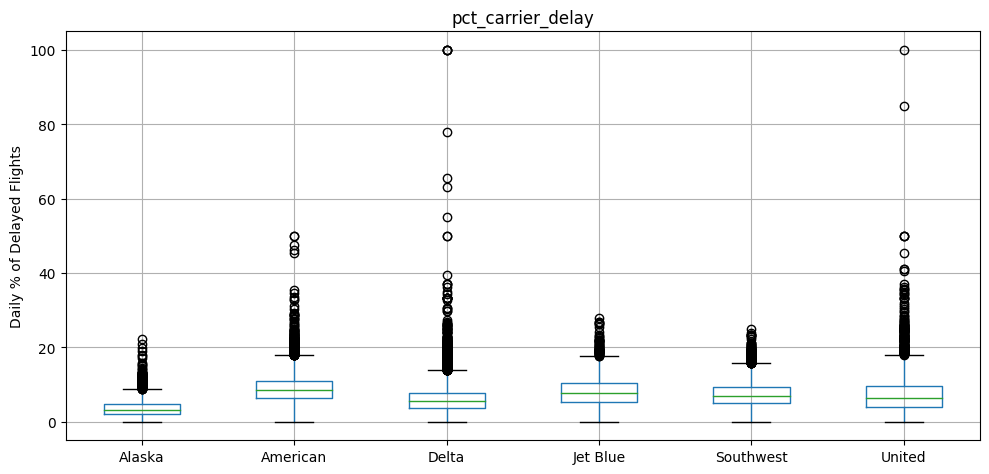

In [47]:
ax=airline.boxplot(by='airline',column='pct_carrier_delay', figsize=(10,5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

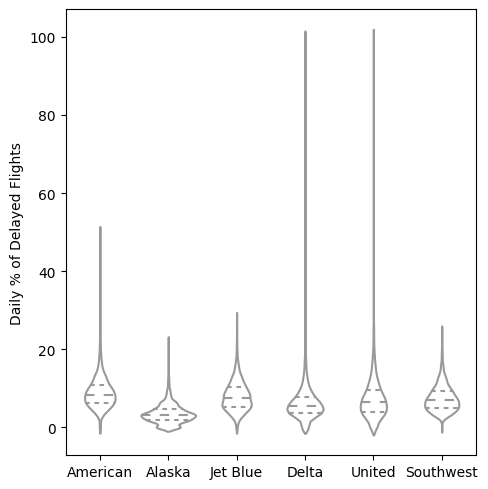

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

g:\data_science\DS\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


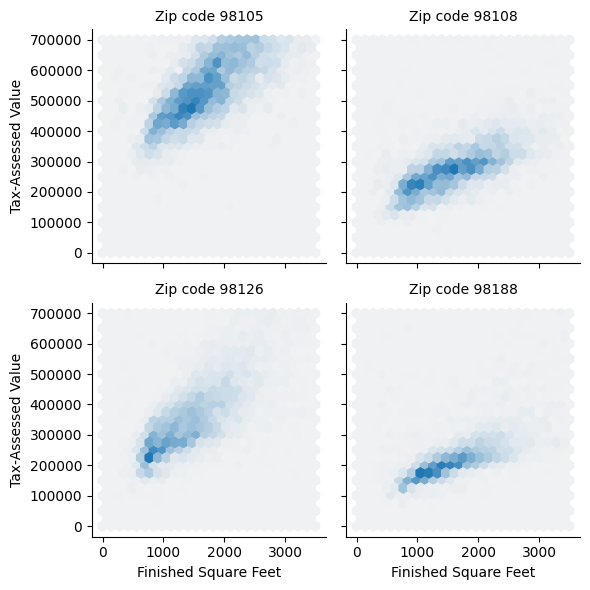

In [53]:
kc_tax = pd.read_csv('G:\data_science\data\kc_tax1.csv')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2) 

g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000]) 
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

### KEY IDEAS
- Hexagonal binning and contour plots are useful tools that permit graphical examination of two numeric variables at a time, without being overwhelmed by huge amounts of data.

- Contingency tables are the standard tool for looking at the counts of two categorical variables.

- Boxplots and violin plots allow you to plot a numeric variable against a categorical variable.